## Importing Libraries

In [146]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### setting plot size

In [147]:
matplotlib.rcParams['figure.figsize'] = (15, 8)

## importing dataset

In [148]:
df = pd.read_csv("heart_2020_cleaned.csv")

In [149]:
df.head(7)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes


In [150]:
df.HeartDisease.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [151]:
df = df.sort_values("HeartDisease")

In [152]:
df = df.reset_index()

In [153]:
df = df.drop(df.index[0:262422])

In [154]:
df.HeartDisease.value_counts()

No     30000
Yes    27373
Name: HeartDisease, dtype: int64

# Encoding Dataset

In [155]:
df.head()

,index,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
262422,140281,No,34.87,No,No,No,0.0,0.0,No,Male,18-24,White,No,No,Good,8.0,No,No,No
262423,140162,No,42.51,No,No,No,0.0,0.0,No,Female,40-44,White,No,No,Good,5.0,No,No,No
262424,140280,No,30.81,Yes,No,No,0.0,0.0,No,Male,40-44,White,No,Yes,Very good,7.0,No,No,No
262425,140278,No,21.14,Yes,No,No,10.0,15.0,No,Female,25-29,White,No,Yes,Good,6.0,Yes,No,No
262426,140258,No,32.64,No,No,No,30.0,30.0,Yes,Male,65-69,White,Yes,Yes,Fair,5.0,No,No,No


## Dummy Encoding of YES/NO data

In [156]:
df = pd.get_dummies(df, columns= ['HeartDisease', 'Smoking', "AlcoholDrinking", 'Stroke', "DiffWalking", 'Sex', 'PhysicalActivity','KidneyDisease', "SkinCancer", "Asthma"], drop_first=True)

In [157]:
df.head()

,index,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,GenHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,PhysicalActivity_Yes,KidneyDisease_Yes,SkinCancer_Yes,Asthma_Yes
262422,140281,34.87,0.0,0.0,18-24,White,No,Good,8.0,0,0,0,0,0,1,0,0,0,0
262423,140162,42.51,0.0,0.0,40-44,White,No,Good,5.0,0,0,0,0,0,0,0,0,0,0
262424,140280,30.81,0.0,0.0,40-44,White,No,Very good,7.0,0,1,0,0,0,1,1,0,0,0
262425,140278,21.14,10.0,15.0,25-29,White,No,Good,6.0,0,1,0,0,0,0,1,0,0,1
262426,140258,32.64,30.0,30.0,65-69,White,Yes,Fair,5.0,0,0,0,0,1,1,1,0,0,0


## ordinal Encoding of Ordinal Categories

In [158]:
df.AgeCategory.value_counts()

70-74          7624
80 or older    7419
65-69          7406
60-64          6587
75-79          5873
55-59          4889
50-54          3788
45-49          2816
40-44          2608
35-39          2412
18-24          2256
30-34          1963
25-29          1732
Name: AgeCategory, dtype: int64

In [159]:
# df['AgeCategory'] = df['AgeCategory'].replace(['30-34','25-29'],['lesser_or_equal_to_34','lesser_or_equal_to_34'])

In [160]:
 # df['AgeCategory'] = df['AgeCategory'].replace(['lesser_or_equal_to_34'], ['25-34'],)

### Encoding AgeCategory

In [161]:
from sklearn.preprocessing import OrdinalEncoder as OE

In [162]:
orderencoding = OE(categories=[['18-24', '25-29','30-34', '35-39', '40-44', '45-49', '50-54','55-59','60-64', '65-69','70-74', '75-79','80 or older']])
df['AgeCategory'] = orderencoding.fit_transform(df.AgeCategory.values.reshape(-1, 1))
df.head(15)

,index,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,GenHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,PhysicalActivity_Yes,KidneyDisease_Yes,SkinCancer_Yes,Asthma_Yes
262422,140281,34.87,0.0,0.0,0.0,White,No,Good,8.0,0,0,0,0,0,1,0,0,0,0
262423,140162,42.51,0.0,0.0,4.0,White,No,Good,5.0,0,0,0,0,0,0,0,0,0,0
262424,140280,30.81,0.0,0.0,4.0,White,No,Very good,7.0,0,1,0,0,0,1,1,0,0,0
262425,140278,21.14,10.0,15.0,1.0,White,No,Good,6.0,0,1,0,0,0,0,1,0,0,1
262426,140258,32.64,30.0,30.0,9.0,White,Yes,Fair,5.0,0,0,0,0,1,1,1,0,0,0
262427,140257,29.53,6.0,0.0,5.0,White,No,Fair,8.0,0,0,1,0,1,1,0,0,0,0
262428,140256,53.26,0.0,7.0,0.0,Hispanic,No,Very good,6.0,0,0,0,0,0,0,1,0,0,0
262429,140255,38.02,0.0,0.0,4.0,White,No,Good,7.0,0,0,0,0,0,1,1,0,0,0
262430,140254,25.06,4.0,7.0,7.0,White,Yes,Good,8.0,0,1,0,0,0,1,1,0,0,0
262431,140252,23.71,0.0,0.0,7.0,White,No,Excellent,7.0,0,1,1,0,0,1,1,0,0,0


In [163]:
df.GenHealth.value_counts()

Good         18293
Very good    16977
Fair          9781
Excellent     7768
Poor          4554
Name: GenHealth, dtype: int64

In [164]:
orderencoding = OE(categories=[['Poor', 'Fair', 'Good', 'Very good','Excellent']])
df['GenHealth'] = orderencoding.fit_transform(df.GenHealth.values.reshape(-1, 1))
df.head(15)

,index,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,GenHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,PhysicalActivity_Yes,KidneyDisease_Yes,SkinCancer_Yes,Asthma_Yes
262422,140281,34.87,0.0,0.0,0.0,White,No,2.0,8.0,0,0,0,0,0,1,0,0,0,0
262423,140162,42.51,0.0,0.0,4.0,White,No,2.0,5.0,0,0,0,0,0,0,0,0,0,0
262424,140280,30.81,0.0,0.0,4.0,White,No,3.0,7.0,0,1,0,0,0,1,1,0,0,0
262425,140278,21.14,10.0,15.0,1.0,White,No,2.0,6.0,0,1,0,0,0,0,1,0,0,1
262426,140258,32.64,30.0,30.0,9.0,White,Yes,1.0,5.0,0,0,0,0,1,1,1,0,0,0
262427,140257,29.53,6.0,0.0,5.0,White,No,1.0,8.0,0,0,1,0,1,1,0,0,0,0
262428,140256,53.26,0.0,7.0,0.0,Hispanic,No,3.0,6.0,0,0,0,0,0,0,1,0,0,0
262429,140255,38.02,0.0,0.0,4.0,White,No,2.0,7.0,0,0,0,0,0,1,1,0,0,0
262430,140254,25.06,4.0,7.0,7.0,White,Yes,2.0,8.0,0,1,0,0,0,1,1,0,0,0
262431,140252,23.71,0.0,0.0,7.0,White,No,4.0,7.0,0,1,1,0,0,1,1,0,0,0


### Encoding MentalHealth and Physicalhealth

In [165]:
# def condition(s):
#     if(s['MentalHealth'] == 0):
#         return 1   
#     elif(s['MentalHealth'] > 0 and s['MentalHealth'] <= 5):
#         return 2
#     elif(s['MentalHealth'] >= 6 and s['MentalHealth'] <= 10):
#         return 3
#     elif(s['MentalHealth'] >= 11 and s['MentalHealth'] <= 15):
#         return 4
#     elif(s['MentalHealth'] >= 16 and s['MentalHealth'] <= 20):
#         return 5
#     elif(s['MentalHealth'] >= 21 and s['MentalHealth'] <= 25):
#         return 6
#     elif(s['MentalHealth'] >= 25 and s['MentalHealth'] <= 30):
#         return 7

# df['MentalHealth'] = df.apply(condition, axis=1)

In [166]:
# def condition(s):
#     if(s['PhysicalHealth'] == 0):
#         return 1   
#     elif(s['PhysicalHealth'] > 0 and s['PhysicalHealth'] <= 5):
#         return 2
#     elif(s['PhysicalHealth'] >= 6 and s['PhysicalHealth'] <= 10):
#         return 3
#     elif(s['PhysicalHealth'] >= 11 and s['PhysicalHealth'] <= 15):
#         return 4
#     elif(s['PhysicalHealth'] >= 16 and s['PhysicalHealth'] <= 20):
#         return 5
#     elif(s['PhysicalHealth'] >= 21 and s['PhysicalHealth'] <= 25):
#         return 6
#     elif(s['PhysicalHealth'] >= 25 and s['PhysicalHealth'] <= 30):
#         return 7

# df['PhysicalHealth'] = df.apply(condition, axis=1)

### Label Encoding Race and Diabetic

In [167]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [168]:
for i in ['Race', 'Diabetic']:
    df[i] = LE.fit_transform(df[i])

In [169]:
print(df.Race.value_counts())
df.Diabetic.value_counts()

5    48944
2     3101
3     2498
4     1480
0      756
1      594
Name: Race, dtype: int64


0    43404
2    12275
1     1326
3      368
Name: Diabetic, dtype: int64

### validating encoded values

In [170]:
df.head()

,index,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,GenHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,PhysicalActivity_Yes,KidneyDisease_Yes,SkinCancer_Yes,Asthma_Yes
262422,140281,34.87,0.0,0.0,0.0,5,0,2.0,8.0,0,0,0,0,0,1,0,0,0,0
262423,140162,42.51,0.0,0.0,4.0,5,0,2.0,5.0,0,0,0,0,0,0,0,0,0,0
262424,140280,30.81,0.0,0.0,4.0,5,0,3.0,7.0,0,1,0,0,0,1,1,0,0,0
262425,140278,21.14,10.0,15.0,1.0,5,0,2.0,6.0,0,1,0,0,0,0,1,0,0,1
262426,140258,32.64,30.0,30.0,9.0,5,2,1.0,5.0,0,0,0,0,1,1,1,0,0,0


## Feature engineering of continuous variables

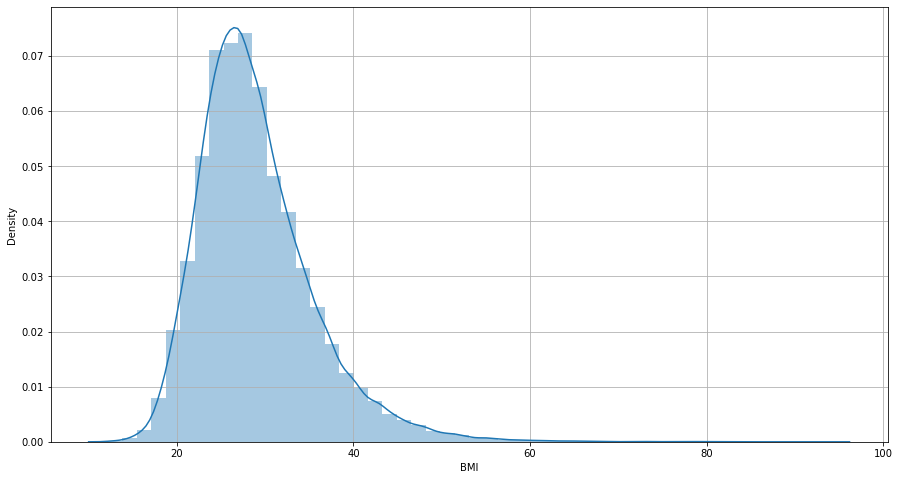

In [171]:
sns.distplot(df.BMI)
plt.grid()

In [172]:
# df.BMI = pd.cut(df['BMI'], 12)

In [173]:
df.BMI.value_counts()

26.63    635
27.12    488
27.44    453
27.46    447
24.41    410
        ... 
45.83      1
38.78      1
17.31      1
31.98      1
20.71      1
Name: BMI, Length: 2536, dtype: int64

In [174]:
df.BMI.dtype

dtype('float64')

In [175]:
df.SleepTime.value_counts().sort_index()

1.0        95
2.0       207
3.0       510
4.0      1817
5.0      3750
6.0     11562
7.0     15886
8.0     17515
9.0      3217
10.0     1880
11.0      111
12.0      583
13.0       24
14.0       58
15.0       44
16.0       47
17.0        6
18.0       27
19.0        1
20.0       21
22.0        3
24.0        9
Name: SleepTime, dtype: int64

In [176]:
# df['SleepTime'].value_counts()

In [177]:
df.head()

,index,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,GenHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,PhysicalActivity_Yes,KidneyDisease_Yes,SkinCancer_Yes,Asthma_Yes
262422,140281,34.87,0.0,0.0,0.0,5,0,2.0,8.0,0,0,0,0,0,1,0,0,0,0
262423,140162,42.51,0.0,0.0,4.0,5,0,2.0,5.0,0,0,0,0,0,0,0,0,0,0
262424,140280,30.81,0.0,0.0,4.0,5,0,3.0,7.0,0,1,0,0,0,1,1,0,0,0
262425,140278,21.14,10.0,15.0,1.0,5,0,2.0,6.0,0,1,0,0,0,0,1,0,0,1
262426,140258,32.64,30.0,30.0,9.0,5,2,1.0,5.0,0,0,0,0,1,1,1,0,0,0


In [178]:
df = df.drop('index', axis=1)

In [179]:
df_norm = df.apply(lambda rec: (rec - min(rec)) / (max(rec) - min(rec)))
df_norm.head()


,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,GenHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,PhysicalActivity_Yes,KidneyDisease_Yes,SkinCancer_Yes,Asthma_Yes
262422,0.277153,0.000000,0.0,0.000000,1.0,0.000000,0.50,0.304348,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
262423,0.370597,0.000000,0.0,0.333333,1.0,0.000000,0.50,0.173913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262424,0.227495,0.000000,0.0,0.333333,1.0,0.000000,0.75,0.260870,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
262425,0.109222,0.333333,0.5,0.083333,1.0,0.000000,0.50,0.217391,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
262426,0.249878,1.000000,1.0,0.750000,1.0,0.666667,0.25,0.173913,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


## splitting dependant and independant variables

In [180]:
X = df_norm.drop(['HeartDisease_Yes'], axis =1)
y = df_norm.HeartDisease_Yes

## Downscaling x variables

In [181]:
# from imblearn.under_sampling import TomekLinks
# undersample = TomekLinks()
# X, y  = undersample.fit_resample(X, y)

In [182]:
y.value_counts()

0.0    30000
1.0    27373
Name: HeartDisease_Yes, dtype: int64

# Decision Tree Model

## Splitting train test set

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y) # for split in equal ratio stratify - y

In [184]:
print(y_test.value_counts())
y_train.value_counts()

0.0    9000
1.0    8212
Name: HeartDisease_Yes, dtype: int64


0.0    21000
1.0    19161
Name: HeartDisease_Yes, dtype: int64

## Building Basic Algorithm

In [185]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

In [186]:
models=[KNeighborsClassifier(),LogisticRegression(),XGBClassifier(),RandomForestClassifier(), GaussianNB()]
scores=dict()

performance_table = ['Model', 'Accuracy', 'Precision', 'Percentage_mislabbled'
                                            'Total_Ones', 'Mislabble_Ones', 'Percent_Mislabbled_Ones', 'Recall_Score', 'F1_Score']

Model = []
Accuracy = []
Precision = []
Percentage_mislabbled = []
Percent_Mislabbled_zeroes =[]
Percent_Mislabbled_Ones =[]
Recall_Score =[]
F1_Score = []


for m in models:
    m.fit(X_train,y_train)
    y_pred=m.predict(X_test)
    percent_mislabbled = (((y_test != y_pred).sum())/X_test.shape[0])*100
    

    y_pred_df = pd.DataFrame(np.array(y_pred), columns= ['ypred'])
    y_test_df = pd.DataFrame(y_test.values, columns = ['y_test'])
    df_test = pd.concat([y_pred_df, y_test_df], axis=1)
    df_test1 = df_test[df_test['y_test'] == 1]
    df_test0 = df_test[df_test['y_test'] == 0]
    percent_how_many_ones_mislabbled = ((df_test1.y_test != df_test1.ypred).sum()) / (len(df_test[df_test['y_test'] == 1])) * 100
    percent_how_many_zeroes_mislabbled = ((df_test0.y_test != df_test0.ypred).sum()) / (len(df_test[df_test['y_test'] == 0])) * 100
    
    

    Model.append(m)    
    Accuracy.append(accuracy_score(y_test,y_pred))
    Precision.append(precision_score(y_test,y_pred))
    Percentage_mislabbled.append(percent_mislabbled)
    Percent_Mislabbled_zeroes.append(percent_how_many_zeroes_mislabbled)    
    Percent_Mislabbled_Ones.append(percent_how_many_ones_mislabbled)
    Recall_Score.append(recall_score(y_test,y_pred))
    F1_Score.append(f1_score(y_test,y_pred))

performance_table = {'Model':Model , 'Accuracy':Accuracy, 'Precision': Precision, 'Percentage_mislabbled':Percentage_mislabbled, 'Percent_Mislabbled_zeroes': Percent_Mislabbled_zeroes,
                                            'Percent_Mislabbled_Ones': Percent_Mislabbled_Ones , 'Recall_Score': Recall_Score, 
                                            'F1_Score' :F1_Score}

performance_table = pd.DataFrame(performance_table)
performance_table

,Model,Accuracy,Precision,Percentage_mislabbled,Percent_Mislabbled_zeroes,Percent_Mislabbled_Ones,Recall_Score,F1_Score
0,KNeighborsClassifier(),0.728387,0.711215,27.161283,26.866667,27.484170,0.725158,0.718119
1,LogisticRegression(),0.762375,0.752203,23.762491,22.500000,25.146128,0.748539,0.750366
2,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.760167,0.739559,23.983267,24.666667,23.234291,0.767657,0.753346
3,"(DecisionTreeClassifier(max_features='sqrt', r...",0.739077,0.718087,26.092261,26.722222,25.401851,0.745981,0.731769
4,GaussianNB(),0.711422,0.753873,28.857774,17.477778,41.329761,0.586702,0.659864


In [187]:
rft = RandomForestClassifier(criterion = 'gini',
                            n_estimators = 300,
                            max_depth = 20,
                            max_features = 'sqrt',
                            min_samples_split = 15,
                            min_samples_leaf = 2,
                            max_leaf_nodes =  15)
rft.fit(X_train,y_train)
pd.DataFrame({"Featrues" : X_train.columns, "score":rft.feature_importances_}).sort_values("score", ascending=False)

,Featrues,score
3,AgeCategory,0.375536
6,GenHealth,0.232133
11,DiffWalking_Yes,0.112470
5,Diabetic,0.085129
10,Stroke_Yes,0.061320
1,PhysicalHealth,0.046122
12,Sex_Male,0.035152
8,Smoking_Yes,0.015855
14,KidneyDisease_Yes,0.015655
15,SkinCancer_Yes,0.010513


In [188]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
for ind in range(len(df.columns)):
    
    vif = pd.DataFrame()

    vif["VIF_Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    vif["Features"] = df.columns

    multi = vif[vif['VIF_Factor'] > 5]
    
print(multi)

   VIF_Factor     Features
0   15.852954          BMI
3    8.869200  AgeCategory
4   18.692269         Race
6    7.897287    GenHealth
7   17.387411    SleepTime


# Removing insignificant Variables

In [189]:
X_dropped = df.drop(['HeartDisease_Yes', "Race"], axis =1)
y_dropped = df.HeartDisease_Yes

In [190]:
y_dropped.value_counts()

0    30000
1    27373
Name: HeartDisease_Yes, dtype: int64

## Splitting train test set

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dropped, y_dropped, test_size=0.3, random_state=1, stratify = y) # for split in equal ratio stratify - y

In [192]:
print(y_test.value_counts())
y_train.value_counts()

0    9000
1    8212
Name: HeartDisease_Yes, dtype: int64


0    21000
1    19161
Name: HeartDisease_Yes, dtype: int64

## Building Basic Algorithm

In [193]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

In [194]:
models=[XGBClassifier(n_estimators=2000, eta=0.05, subsample=0.5, colsample_bytree=0.5)]
scores=dict()

performance_table = ['Model', 'Accuracy', 'Precision', 'Percentage_mislabbled'
                                            'Total_Ones', 'Mislabble_Ones', 'Percent_Mislabbled_Ones', 'Recall_Score', 'F1_Score']

Model = []
Accuracy = []
Precision = []
Percentage_mislabbled = []
Percent_Mislabbled_zeroes =[]
Percent_Mislabbled_Ones =[]
Recall_Score =[]
F1_Score = []


for m in models:
    m.fit(X_train,y_train)
    y_pred=m.predict(X_test)
    percent_mislabbled = (((y_test != y_pred).sum())/X_test.shape[0])*100
    

    y_pred_df = pd.DataFrame(np.array(y_pred), columns= ['ypred'])
    y_test_df = pd.DataFrame(y_test.values, columns = ['y_test'])
    df_test = pd.concat([y_pred_df, y_test_df], axis=1)
    df_test1 = df_test[df_test['y_test'] == 1]
    df_test0 = df_test[df_test['y_test'] == 0]
    percent_how_many_ones_mislabbled = ((df_test1.y_test != df_test1.ypred).sum()) / (len(df_test[df_test['y_test'] == 1])) * 100
    percent_how_many_zeroes_mislabbled = ((df_test0.y_test != df_test0.ypred).sum()) / (len(df_test[df_test['y_test'] == 0])) * 100
    
    

    Model.append(m)    
    Accuracy.append(accuracy_score(y_test,y_pred))
    Precision.append(precision_score(y_test,y_pred))
    Percentage_mislabbled.append(percent_mislabbled)
    Percent_Mislabbled_zeroes.append(percent_how_many_zeroes_mislabbled)    
    Percent_Mislabbled_Ones.append(percent_how_many_ones_mislabbled)
    Recall_Score.append(recall_score(y_test,y_pred))
    F1_Score.append(f1_score(y_test,y_pred))

performance_table = {'Model':Model , 'Accuracy':Accuracy, 'Precision': Precision, 'Percentage_mislabbled':Percentage_mislabbled, 'Percent_Mislabbled_zeroes': Percent_Mislabbled_zeroes,
                                            'Percent_Mislabbled_Ones': Percent_Mislabbled_Ones , 'Recall_Score': Recall_Score, 
                                            'F1_Score' :F1_Score}

performance_table = pd.DataFrame(performance_table)
performance_table.T

,0
Model,"XGBClassifier(base_score=0.5, booster='gbtree'..."
Accuracy,0.748896
Precision,0.730778
Percentage_mislabbled,25.110388
Percent_Mislabbled_zeroes,25.211111
Percent_Mislabbled_Ones,25.0
Recall_Score,0.75
F1_Score,0.740264


# PCA

In [195]:
# PCA
from sklearn.preprocessing import StandardScaler

x=df.drop(["HeartDisease_Yes"],axis=1)
y=df["HeartDisease_Yes"]

sc=StandardScaler()
x_sc=sc.fit_transform(x)
cov_matrix=np.cov(x_sc.T)
eigenval,eigen_vector=np.linalg.eig(cov_matrix)

In [196]:
eigenval=eigenval/sum(eigenval)*100
print(eigenval)

[17.66991449  9.23059261  2.36922269  7.03025684  3.12695415  3.22839727
  6.6104615   4.02089986  5.95272716  5.84207428  4.31943847  5.5903786
  4.65483979  5.32370166  5.08357504  4.94965989  4.9969057 ]


In [197]:
cum_sum=np.cumsum(eigenval)
cum_sum

array([ 17.66991449,  26.9005071 ,  29.26972979,  36.29998663,
        39.42694078,  42.65533805,  49.26579955,  53.28669941,
        59.23942657,  65.08150085,  69.40093932,  74.99131792,
        79.64615771,  84.96985937,  90.05343441,  95.0030943 ,
       100.        ])

In [198]:
from sklearn.decomposition import PCA
mpca=PCA(n_components=15)
da=mpca.fit_transform(x_sc)
pca_df=pd.DataFrame(da)
pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.876594,-1.058790,-0.669825,1.091217,-0.299511,0.946718,-0.758305,0.040400,0.961879,1.079146,-0.097270,-1.627619,0.668052,-0.726164,-1.021838
1,-0.248763,-1.517451,-1.172888,0.333887,-1.362897,0.899386,-1.048800,0.472417,-1.214191,0.587440,-0.633952,-1.148982,1.141739,0.188694,-0.484798
2,-1.492927,-0.291985,0.597658,1.320130,-0.080966,-0.199044,-0.231201,-0.406237,0.527438,-0.328122,-0.339863,-0.036928,0.481810,0.464104,-0.488385
3,-0.145932,-2.514651,1.269225,-1.352977,-0.629558,-0.871358,1.034390,-1.335974,0.637514,-1.324218,-0.104293,0.222863,0.110194,-0.564402,-0.873614
4,3.095037,-1.391240,0.385926,0.291850,-1.289880,-1.103320,-1.327723,0.865786,0.929010,1.213134,-0.185578,1.776207,-1.852537,-0.544640,1.079692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57368,-1.754968,0.226708,-0.123658,0.130790,-0.001135,-0.626281,-0.415038,0.157024,0.516009,0.236513,-0.197509,-0.484712,-0.851670,-0.220231,0.137173
57369,-0.355248,0.618301,0.286341,1.655453,-0.368058,-0.359151,-0.316358,-0.290360,-0.415514,-0.667807,-0.459925,0.675150,-0.203302,0.175983,0.341879
57370,0.171608,0.335736,0.912319,0.897411,-0.229667,-0.214388,-0.829486,-0.399637,0.723862,-0.166120,-0.149930,0.025552,-0.724610,1.148879,-0.505261
57371,2.227246,0.015565,-1.096215,-1.505783,-1.206263,-1.160879,2.040351,1.431329,0.925447,-2.217219,-0.363207,-0.905354,-1.616016,0.158001,-0.604196


In [199]:
y_dropped.reset_index(drop= True, inplace=True)

In [200]:
newpcadf_ = pd.concat([y_dropped, pca_df], axis=1)
newpcadf_.shape

(57373, 16)

In [201]:
Xpca = newpcadf_.drop('HeartDisease_Yes', axis= 1)
ypca = newpcadf_.HeartDisease_Yes

In [202]:
from sklearn.model_selection import train_test_split
X_trainpca, X_testpca, y_trainpca, y_testpca = train_test_split(Xpca, ypca, test_size=0.3, random_state=1, stratify = y) # for split in equal ratio stratify - y

In [203]:
models=[KNeighborsClassifier(),LogisticRegression(),XGBClassifier(),RandomForestClassifier(), GaussianNB()]
scores=dict()

performance_table = ['Model', 'Accuracy', 'Precision', 'Percentage_mislabbled'
                                            'Total_Ones', 'Mislabble_Ones', 'Percent_Mislabbled_Ones', 'Recall_Score', 'F1_Score']

Model = []
Accuracy = []
Precision = []
Percentage_mislabbled = []
Percent_Mislabbled_zeroes =[]
Percent_Mislabbled_Ones =[]
Recall_Score =[]
F1_Score = []


for m in models:
    m.fit(X_trainpca,y_trainpca)
    y_pred=m.predict(X_testpca)
    percent_mislabbled = (((y_test != y_pred).sum())/X_test.shape[0])*100
    

    y_pred_df = pd.DataFrame(np.array(y_pred), columns= ['ypred'])
    y_test_df = pd.DataFrame(y_test.values, columns = ['y_test'])
    df_test = pd.concat([y_pred_df, y_test_df], axis=1)
    df_test1 = df_test[df_test['y_test'] == 1]
    df_test0 = df_test[df_test['y_test'] == 0]
    percent_how_many_ones_mislabbled = ((df_test1.y_test != df_test1.ypred).sum()) / (len(df_test[df_test['y_test'] == 1])) * 100
    percent_how_many_zeroes_mislabbled = ((df_test0.y_test != df_test0.ypred).sum()) / (len(df_test[df_test['y_test'] == 0])) * 100
    
    

    Model.append(m)    
    Accuracy.append(accuracy_score(y_test,y_pred))
    Precision.append(precision_score(y_test,y_pred))
    Percentage_mislabbled.append(percent_mislabbled)
    Percent_Mislabbled_zeroes.append(percent_how_many_zeroes_mislabbled)    
    Percent_Mislabbled_Ones.append(percent_how_many_ones_mislabbled)
    Recall_Score.append(recall_score(y_test,y_pred))
    F1_Score.append(f1_score(y_test,y_pred))

performance_table = {'Model':Model , 'Accuracy':Accuracy, 'Precision': Precision, 'Percentage_mislabbled':Percentage_mislabbled, 'Percent_Mislabbled_zeroes': Percent_Mislabbled_zeroes,
                                            'Percent_Mislabbled_Ones': Percent_Mislabbled_Ones , 'Recall_Score': Recall_Score, 
                                            'F1_Score' :F1_Score}

performance_table = pd.DataFrame(performance_table)
performance_table.T

,0,1,2,3,4
Model,KNeighborsClassifier(),LogisticRegression(),"XGBClassifier(base_score=0.5, booster='gbtree'...","(DecisionTreeClassifier(max_features='sqrt', r...",GaussianNB()
Accuracy,0.725657,0.755752,0.752382,0.74053,0.694574
Precision,0.710241,0.752266,0.730133,0.717538,0.71623
Percentage_mislabbled,27.434348,24.42482,24.761794,25.947014,30.542645
Percent_Mislabbled_zeroes,26.722222,21.866667,25.733333,27.022222,21.544444
Percent_Mislabbled_Ones,28.214808,27.228446,23.697029,24.768631,40.404286
Recall_Score,0.717852,0.727716,0.76303,0.752314,0.595957
F1_Score,0.714026,0.739787,0.746219,0.734514,0.650582
